In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('new_train.csv')
#data = pd.read_csv("train.csv")

In [3]:
data.shape

(229786, 46)

In [69]:
print("The data loss after outlier treatment (In rows): ")
print(233154-229786)

The data loss after outlier treatment (In rows): 
3368


In [5]:
data.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default', 'disbursed_amount_sqrt', 'asset_cost_log', 'ltv_cbrt',
       'PRI.SANCTIONED.AMOUNT_sqrt', 'PRI

In [6]:
data1 = data[['disbursed_amount_sqrt','ltv_cbrt','Date.of.Birth','Employment.Type','Aadhar_flag','PERFORM_CNS.SCORE.DESCRIPTION','PRI.OVERDUE.ACCTS','PRI.CURRENT.BALANCE','PRI.SANCTIONED.AMOUNT','PRI.DISBURSED.AMOUNT','PRIMARY.INSTAL.AMT','NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS','AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH','NO.OF_INQUIRIES']]
#data1 = data[['Date.of.Birth','Employment.Type','Aadhar_flag','PERFORM_CNS.SCORE.DESCRIPTION','PRI.OVERDUE.ACCTS','PRI.CURRENT.BALANCE','PRI.SANCTIONED.AMOUNT','PRI.DISBURSED.AMOUNT','PRIMARY.INSTAL.AMT','NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS','AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH','NO.OF_INQUIRIES']]

In [7]:
data1.head()

,disbursed_amount_sqrt,ltv_cbrt,Date.of.Birth,Employment.Type,Aadhar_flag,PERFORM_CNS.SCORE.DESCRIPTION,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES
0,224.895531,4.473923,01-01-84,Salaried,1,No Bureau History Available,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
1,217.128994,4.183724,31-07-85,Self employed,1,I-Medium Risk,1,27600,50200,50200,1991,0,1,1yrs 11mon,1yrs 11mon,0
2,230.820276,4.475255,24-08-85,Self employed,1,No Bureau History Available,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
3,239.818682,4.456033,30-12-93,Self employed,1,L-Very High Risk,0,0,0,0,31,0,0,0yrs 8mon,1yrs 3mon,1
4,228.862404,4.454521,09-12-77,Self employed,1,No Bureau History Available,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1


In [8]:
data1.shape

(229786, 16)

In [9]:
data1.isnull().sum()

disbursed_amount_sqrt                     0
ltv_cbrt                                  0
Date.of.Birth                             0
Employment.Type                        7508
Aadhar_flag                               0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.OVERDUE.ACCTS                         0
PRI.CURRENT.BALANCE                       0
PRI.SANCTIONED.AMOUNT                     0
PRI.DISBURSED.AMOUNT                      0
PRIMARY.INSTAL.AMT                        0
NEW.ACCTS.IN.LAST.SIX.MONTHS              0
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS       0
AVERAGE.ACCT.AGE                          0
CREDIT.HISTORY.LENGTH                     0
NO.OF_INQUIRIES                           0
dtype: int64

In [11]:
print("Percentage of missing values in emp type: "+str((7508/229786)*100))

Percentage of missing values in emp type: 3.2673879174536307


Before proceeding to label encode, let's first fill missing values in emp type

In [12]:
emp_mode = data1["Employment.Type"].mode()
emp_mode[0]

'Self employed'

In [13]:
data1["Employment.Type"].fillna(emp_mode[0],inplace=True)

In [14]:
data1.isnull().sum()

disbursed_amount_sqrt                  0
ltv_cbrt                               0
Date.of.Birth                          0
Employment.Type                        0
Aadhar_flag                            0
PERFORM_CNS.SCORE.DESCRIPTION          0
PRI.OVERDUE.ACCTS                      0
PRI.CURRENT.BALANCE                    0
PRI.SANCTIONED.AMOUNT                  0
PRI.DISBURSED.AMOUNT                   0
PRIMARY.INSTAL.AMT                     0
NEW.ACCTS.IN.LAST.SIX.MONTHS           0
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS    0
AVERAGE.ACCT.AGE                       0
CREDIT.HISTORY.LENGTH                  0
NO.OF_INQUIRIES                        0
dtype: int64

# Feature Engineering

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
empType_le = LabelEncoder()

In [17]:
data1['Employment.Type'] = empType_le.fit_transform(data1['Employment.Type'])

In [18]:
data1.head()

,disbursed_amount_sqrt,ltv_cbrt,Date.of.Birth,Employment.Type,Aadhar_flag,PERFORM_CNS.SCORE.DESCRIPTION,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES
0,224.895531,4.473923,01-01-84,0,1,No Bureau History Available,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
1,217.128994,4.183724,31-07-85,1,1,I-Medium Risk,1,27600,50200,50200,1991,0,1,1yrs 11mon,1yrs 11mon,0
2,230.820276,4.475255,24-08-85,1,1,No Bureau History Available,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
3,239.818682,4.456033,30-12-93,1,1,L-Very High Risk,0,0,0,0,31,0,0,0yrs 8mon,1yrs 3mon,1
4,228.862404,4.454521,09-12-77,1,1,No Bureau History Available,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1


In [19]:
data1['PERFORM_CNS.SCORE.DESCRIPTION'].value_counts()

No Bureau History Available                                115094
C-Very Low Risk                                             15864
A-Very Low Risk                                             13935
D-Very Low Risk                                             11218
B-Very Low Risk                                              9061
M-Very High Risk                                             8673
F-Low Risk                                                   8387
K-High Risk                                                  8134
H-Medium Risk                                                6776
E-Low Risk                                                   5731
I-Medium Risk                                                5496
G-Low Risk                                                   3940
Not Scored: Sufficient History Not Available                 3722
J-High Risk                                                  3689
Not Scored: Not Enough Info available on the customer        3621
Not Scored

In [20]:
data1['PERFORM_CNS.SCORE.DESCRIPTION'].replace(['Not Scored: Sufficient History Not Available','Not Scored: Not Enough Info available on the customer','Not Scored: No Activity seen on the customer (Inactive)','Not Scored: No Updates available in last 36 months','Not Scored: Only a Guarantor'],'Not scored',inplace=True)

In [21]:
data1['PERFORM_CNS.SCORE.DESCRIPTION'].value_counts()

No Bureau History Available    115094
C-Very Low Risk                 15864
A-Very Low Risk                 13935
Not scored                      12669
D-Very Low Risk                 11218
B-Very Low Risk                  9061
M-Very High Risk                 8673
F-Low Risk                       8387
K-High Risk                      8134
H-Medium Risk                    6776
E-Low Risk                       5731
I-Medium Risk                    5496
G-Low Risk                       3940
J-High Risk                      3689
L-Very High Risk                 1119
Name: PERFORM_CNS.SCORE.DESCRIPTION, dtype: int64

In [22]:
data1['PERFORM_CNS.SCORE.DESCRIPTION'].replace(['C-Very Low Risk','A-Very Low Risk','D-Very Low Risk','B-Very Low Risk'],'Low risk',inplace=True)

In [23]:
data1['PERFORM_CNS.SCORE.DESCRIPTION'].value_counts()

No Bureau History Available    115094
Low risk                        50078
Not scored                      12669
M-Very High Risk                 8673
F-Low Risk                       8387
K-High Risk                      8134
H-Medium Risk                    6776
E-Low Risk                       5731
I-Medium Risk                    5496
G-Low Risk                       3940
J-High Risk                      3689
L-Very High Risk                 1119
Name: PERFORM_CNS.SCORE.DESCRIPTION, dtype: int64

In [24]:
data1['PERFORM_CNS.SCORE.DESCRIPTION'].replace(['M-Very High Risk','L-Very High Risk'],'Very high risk',inplace=True)

In [25]:
data1['PERFORM_CNS.SCORE.DESCRIPTION'].value_counts()

No Bureau History Available    115094
Low risk                        50078
Not scored                      12669
Very high risk                   9792
F-Low Risk                       8387
K-High Risk                      8134
H-Medium Risk                    6776
E-Low Risk                       5731
I-Medium Risk                    5496
G-Low Risk                       3940
J-High Risk                      3689
Name: PERFORM_CNS.SCORE.DESCRIPTION, dtype: int64

In [26]:
data1['PERFORM_CNS.SCORE.DESCRIPTION'].replace(['F-Low Risk','E-Low Risk','G-Low Risk'],'Low risk',inplace=True)

In [27]:
data1['PERFORM_CNS.SCORE.DESCRIPTION'].value_counts()

No Bureau History Available    115094
Low risk                        68136
Not scored                      12669
Very high risk                   9792
K-High Risk                      8134
H-Medium Risk                    6776
I-Medium Risk                    5496
J-High Risk                      3689
Name: PERFORM_CNS.SCORE.DESCRIPTION, dtype: int64

In [28]:
data1['PERFORM_CNS.SCORE.DESCRIPTION'].replace(['H-Medium Risk','I-Medium Risk'],'Medium risk',inplace=True)

In [29]:
data1['PERFORM_CNS.SCORE.DESCRIPTION'].value_counts()

No Bureau History Available    115094
Low risk                        68136
Not scored                      12669
Medium risk                     12272
Very high risk                   9792
K-High Risk                      8134
J-High Risk                      3689
Name: PERFORM_CNS.SCORE.DESCRIPTION, dtype: int64

In [30]:
data1['PERFORM_CNS.SCORE.DESCRIPTION'].replace(['K-High Risk','J-High Risk'],'High risk',inplace=True)

In [31]:
data1['PERFORM_CNS.SCORE.DESCRIPTION'].value_counts()

No Bureau History Available    115094
Low risk                        68136
Not scored                      12669
Medium risk                     12272
High risk                       11823
Very high risk                   9792
Name: PERFORM_CNS.SCORE.DESCRIPTION, dtype: int64

In [32]:
cns_le = LabelEncoder()

In [33]:
data1['PERFORM_CNS.SCORE.DESCRIPTION'] = cns_le.fit_transform(data1['PERFORM_CNS.SCORE.DESCRIPTION'])

In [34]:
data1['PERFORM_CNS.SCORE.DESCRIPTION'].value_counts()

3    115094
1     68136
4     12669
2     12272
0     11823
5      9792
Name: PERFORM_CNS.SCORE.DESCRIPTION, dtype: int64

In [35]:
cns_le.classes_

array(['High risk', 'Low risk', 'Medium risk',
       'No Bureau History Available', 'Not scored', 'Very high risk'],
      dtype=object)

In [36]:
data1['Date.of.Birth'] = pd.to_datetime(data1['Date.of.Birth'])

In [37]:
data1.dtypes

disbursed_amount_sqrt                         float64
ltv_cbrt                                      float64
Date.of.Birth                          datetime64[ns]
Employment.Type                                 int32
Aadhar_flag                                     int64
PERFORM_CNS.SCORE.DESCRIPTION                   int32
PRI.OVERDUE.ACCTS                               int64
PRI.CURRENT.BALANCE                             int64
PRI.SANCTIONED.AMOUNT                           int64
PRI.DISBURSED.AMOUNT                            int64
PRIMARY.INSTAL.AMT                              int64
NEW.ACCTS.IN.LAST.SIX.MONTHS                    int64
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS             int64
AVERAGE.ACCT.AGE                               object
CREDIT.HISTORY.LENGTH                          object
NO.OF_INQUIRIES                                 int64
dtype: object

In [38]:
import datetime
data1["Age"] = datetime.datetime.now().year - data1['Date.of.Birth'].dt.year

In [39]:
data1.head()

,disbursed_amount_sqrt,ltv_cbrt,Date.of.Birth,Employment.Type,Aadhar_flag,PERFORM_CNS.SCORE.DESCRIPTION,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,Age
0,224.895531,4.473923,1984-01-01,0,1,3,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,36
1,217.128994,4.183724,1985-07-31,1,1,2,1,27600,50200,50200,1991,0,1,1yrs 11mon,1yrs 11mon,0,35
2,230.820276,4.475255,1985-08-24,1,1,3,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,35
3,239.818682,4.456033,1993-12-30,1,1,5,0,0,0,0,31,0,0,0yrs 8mon,1yrs 3mon,1,27
4,228.862404,4.454521,1977-09-12,1,1,3,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,43


In [40]:
data1["Amnt_diff"] = data1['PRI.SANCTIONED.AMOUNT'] - data1['PRI.DISBURSED.AMOUNT']

In [41]:
data1.head()

,disbursed_amount_sqrt,ltv_cbrt,Date.of.Birth,Employment.Type,Aadhar_flag,PERFORM_CNS.SCORE.DESCRIPTION,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,Age,Amnt_diff
0,224.895531,4.473923,1984-01-01,0,1,3,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,36,0
1,217.128994,4.183724,1985-07-31,1,1,2,1,27600,50200,50200,1991,0,1,1yrs 11mon,1yrs 11mon,0,35,0
2,230.820276,4.475255,1985-08-24,1,1,3,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,35,0
3,239.818682,4.456033,1993-12-30,1,1,5,0,0,0,0,31,0,0,0yrs 8mon,1yrs 3mon,1,27,0
4,228.862404,4.454521,1977-09-12,1,1,3,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,43,0


In [46]:
#data1['yr'].apply(lambda x:x for)

In [70]:
import re

In [48]:
data1['Risk'] = data['loan_default']

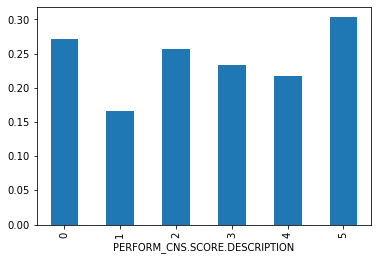

In [50]:
data1.groupby('PERFORM_CNS.SCORE.DESCRIPTION')['Risk'].mean().plot('bar')

In [51]:
data1.head()

,disbursed_amount_sqrt,ltv_cbrt,Date.of.Birth,Employment.Type,Aadhar_flag,PERFORM_CNS.SCORE.DESCRIPTION,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,...,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,Age,Amnt_diff,yr,mn,Risk
0,224.895531,4.473923,1984-01-01,0,1,3,0,0,0,0,...,0,0,0yrs 0mon,0yrs 0mon,0,36,0,0yrs,0mon,0
1,217.128994,4.183724,1985-07-31,1,1,2,1,27600,50200,50200,...,0,1,1yrs 11mon,1yrs 11mon,0,35,0,1yrs,11mon,1
2,230.820276,4.475255,1985-08-24,1,1,3,0,0,0,0,...,0,0,0yrs 0mon,0yrs 0mon,0,35,0,0yrs,0mon,0
3,239.818682,4.456033,1993-12-30,1,1,5,0,0,0,0,...,0,0,0yrs 8mon,1yrs 3mon,1,27,0,0yrs,8mon,1
4,228.862404,4.454521,1977-09-12,1,1,3,0,0,0,0,...,0,0,0yrs 0mon,0yrs 0mon,1,43,0,0yrs,0mon,1


In [52]:
data1["new"] = data1["AVERAGE.ACCT.AGE"].apply(lambda x: re.findall(r'\d+',x))

In [53]:
data1.head()

,disbursed_amount_sqrt,ltv_cbrt,Date.of.Birth,Employment.Type,Aadhar_flag,PERFORM_CNS.SCORE.DESCRIPTION,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,...,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,Age,Amnt_diff,yr,mn,Risk,new
0,224.895531,4.473923,1984-01-01,0,1,3,0,0,0,0,...,0,0yrs 0mon,0yrs 0mon,0,36,0,0yrs,0mon,0,"[0, 0]"
1,217.128994,4.183724,1985-07-31,1,1,2,1,27600,50200,50200,...,1,1yrs 11mon,1yrs 11mon,0,35,0,1yrs,11mon,1,"[1, 11]"
2,230.820276,4.475255,1985-08-24,1,1,3,0,0,0,0,...,0,0yrs 0mon,0yrs 0mon,0,35,0,0yrs,0mon,0,"[0, 0]"
3,239.818682,4.456033,1993-12-30,1,1,5,0,0,0,0,...,0,0yrs 8mon,1yrs 3mon,1,27,0,0yrs,8mon,1,"[0, 8]"
4,228.862404,4.454521,1977-09-12,1,1,3,0,0,0,0,...,0,0yrs 0mon,0yrs 0mon,1,43,0,0yrs,0mon,1,"[0, 0]"


In [57]:
mnths = []
for i in range(len(data1)):
    mnths.append(int(data1.new[i][0])*12 + int(data1.new[i][1]))
data1['AVERAGE.ACCT.AGE.MONTHS'] = mnths

In [59]:
data1.head()

,disbursed_amount_sqrt,ltv_cbrt,Date.of.Birth,Employment.Type,Aadhar_flag,PERFORM_CNS.SCORE.DESCRIPTION,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,...,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,Age,Amnt_diff,yr,mn,Risk,new,AVERAGE.ACCT.AGE.MONTHS
0,224.895531,4.473923,1984-01-01,0,1,3,0,0,0,0,...,0yrs 0mon,0yrs 0mon,0,36,0,0yrs,0mon,0,"[0, 0]",0
1,217.128994,4.183724,1985-07-31,1,1,2,1,27600,50200,50200,...,1yrs 11mon,1yrs 11mon,0,35,0,1yrs,11mon,1,"[1, 11]",23
2,230.820276,4.475255,1985-08-24,1,1,3,0,0,0,0,...,0yrs 0mon,0yrs 0mon,0,35,0,0yrs,0mon,0,"[0, 0]",0
3,239.818682,4.456033,1993-12-30,1,1,5,0,0,0,0,...,0yrs 8mon,1yrs 3mon,1,27,0,0yrs,8mon,1,"[0, 8]",8
4,228.862404,4.454521,1977-09-12,1,1,3,0,0,0,0,...,0yrs 0mon,0yrs 0mon,1,43,0,0yrs,0mon,1,"[0, 0]",0


In [60]:
data1.drop(['new','yr','mn'],1,inplace=True)

In [61]:
data1.head()

,disbursed_amount_sqrt,ltv_cbrt,Date.of.Birth,Employment.Type,Aadhar_flag,PERFORM_CNS.SCORE.DESCRIPTION,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,Age,Amnt_diff,Risk,AVERAGE.ACCT.AGE.MONTHS
0,224.895531,4.473923,1984-01-01,0,1,3,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,36,0,0,0
1,217.128994,4.183724,1985-07-31,1,1,2,1,27600,50200,50200,1991,0,1,1yrs 11mon,1yrs 11mon,0,35,0,1,23
2,230.820276,4.475255,1985-08-24,1,1,3,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,35,0,0,0
3,239.818682,4.456033,1993-12-30,1,1,5,0,0,0,0,31,0,0,0yrs 8mon,1yrs 3mon,1,27,0,1,8
4,228.862404,4.454521,1977-09-12,1,1,3,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,43,0,1,0


In [62]:
data1["new"] = data1["CREDIT.HISTORY.LENGTH"].apply(lambda x: re.findall(r'\d+',x))

In [63]:
mnths = []
for i in range(len(data1)):
    mnths.append(int(data1.new[i][0])*12 + int(data1.new[i][1]))
data1['CREDIT.HISTORY.LENGTH.MONTHS'] = mnths

In [65]:
data1.drop('new',1,inplace=True)

In [66]:
data1.columns

Index(['disbursed_amount_sqrt', 'ltv_cbrt', 'Date.of.Birth', 'Employment.Type',
       'Aadhar_flag', 'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.OVERDUE.ACCTS',
       'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT',
       'PRIMARY.INSTAL.AMT', 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
       'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'AVERAGE.ACCT.AGE',
       'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES', 'Age', 'Amnt_diff', 'Risk',
       'AVERAGE.ACCT.AGE.MONTHS', 'CREDIT.HISTORY.LENGTH.MONTHS'],
      dtype='object')

In [67]:
data1['PERFORM_CNS.SCORE.DESCRIPTION'].value_counts()

3    115094
1     68136
4     12669
2     12272
0     11823
5      9792
Name: PERFORM_CNS.SCORE.DESCRIPTION, dtype: int64

In [68]:
data1.to_csv("final.csv",index=False)